In [1]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\saeed\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\saeed\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\saeed\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
%pip install spectrum

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\saeed\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\saeed\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\saeed\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\saeed\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\saeed\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Missing values:
 timestamp    0
aimp         0
amud         0
arnd         0
asin1        0
asin2        0
adbr         0
adfl         0
bed1         0
bed2         0
bfo1         0
bfo2         0
bso1         0
bso2         0
bso3         0
ced1         0
cfo1         0
cso1         0
y            0
category     0
dtype: int64
Summary statistics:
                aimp          amud          arnd         asin1         asin2  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   1.004660e-02 -2.063128e+00  2.037560e+01  1.376862e-03  4.375382e-04   
std    9.972797e-02  1.247662e+01  1.003736e+01  7.086476e-01  7.069422e-01   
min    0.000000e+00 -4.700000e+01  1.000000e+01 -1.000000e+00 -1.000000e+00   
25%    0.000000e+00 -7.000000e+00  1.246351e+01 -7.100338e-01 -7.065659e-01   
50%    0.000000e+00  0.000000e+00  1.683966e+01  8.296232e-03  1.525203e-03   
75%    0.000000e+00  5.000000e+00  2.549316e+01  7.100337e-01  7.069845e-01   
max    1.000000e+

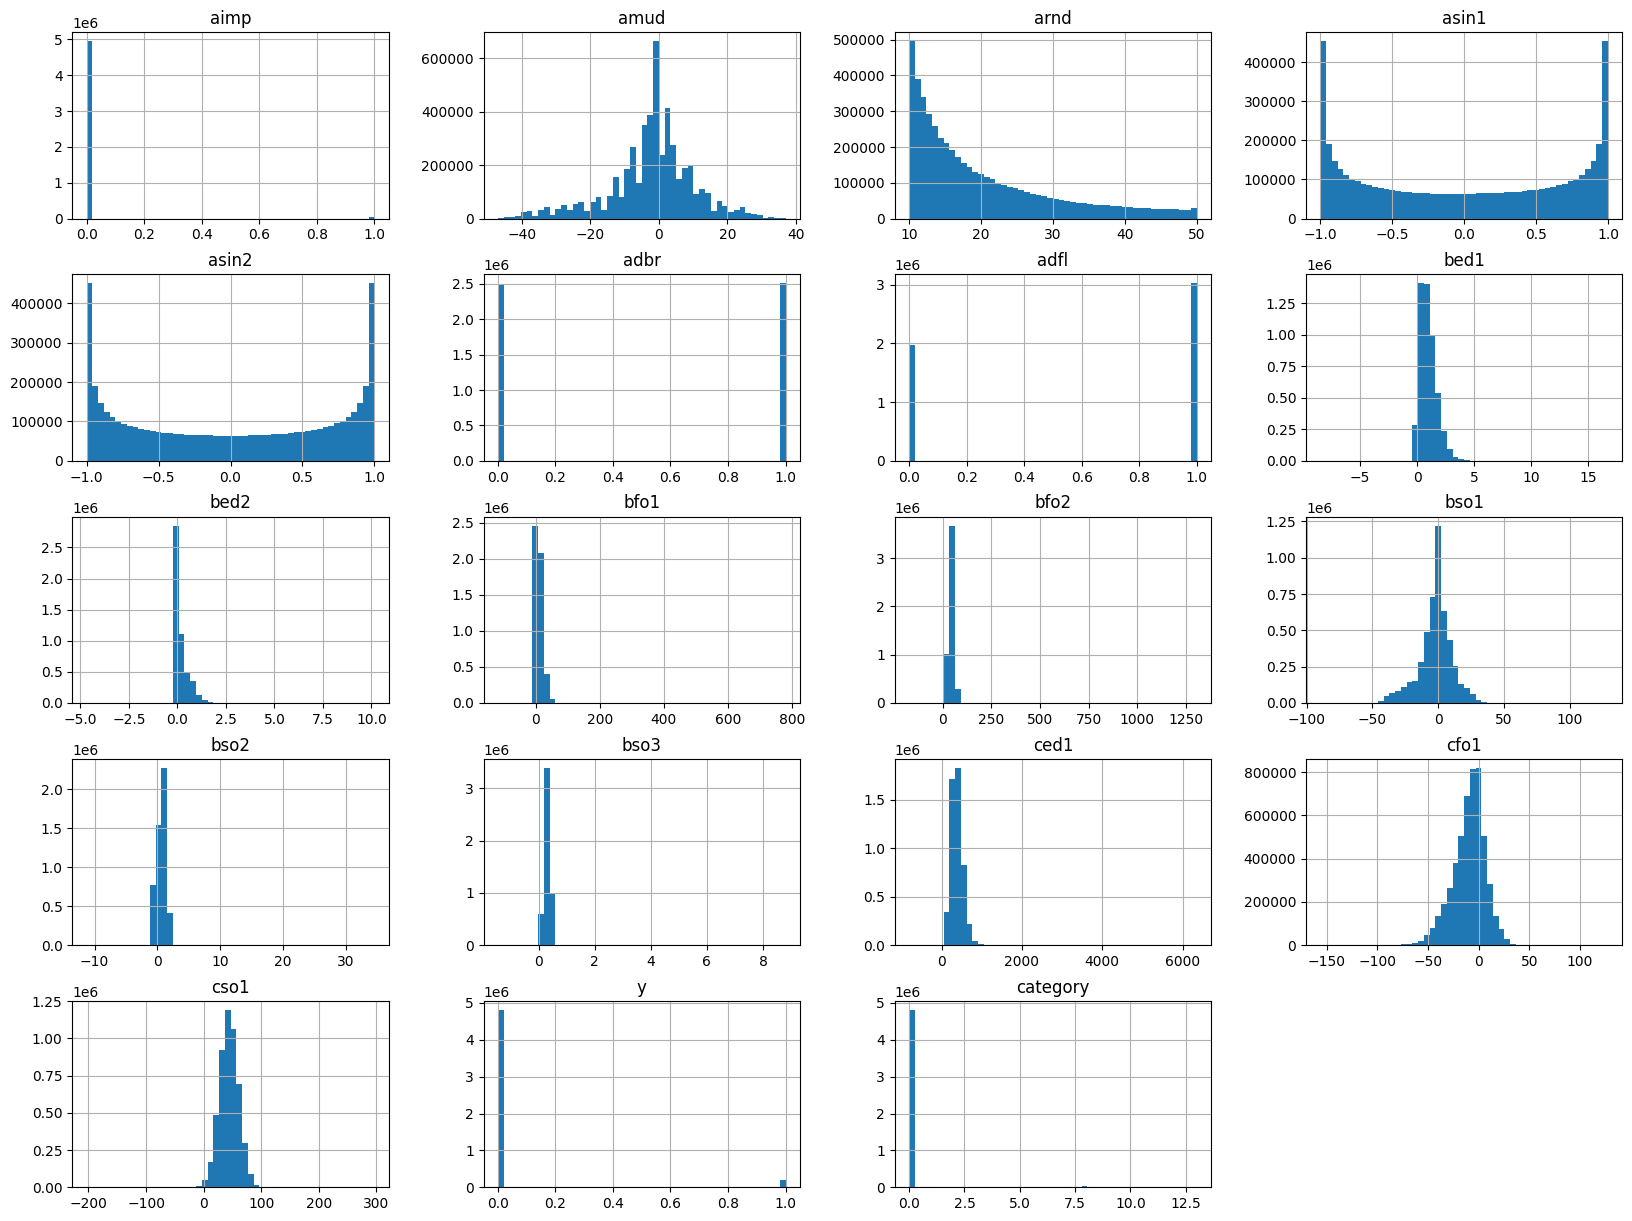

C:\Users\saeed\AppData\Local\Temp\ipykernel_35512\2353107741.py:83: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate()


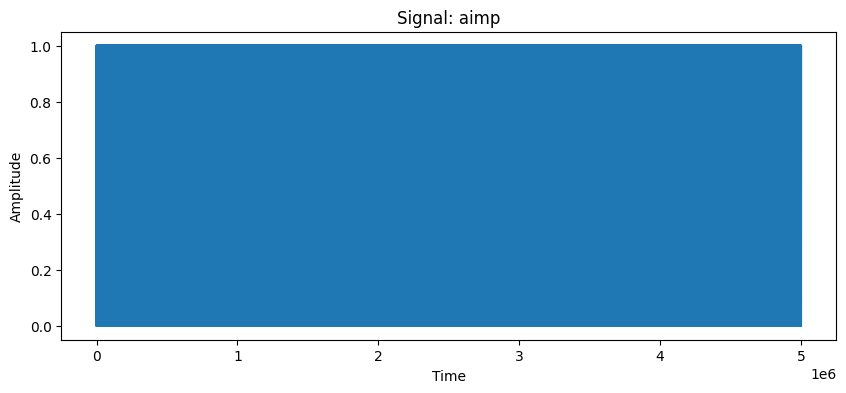

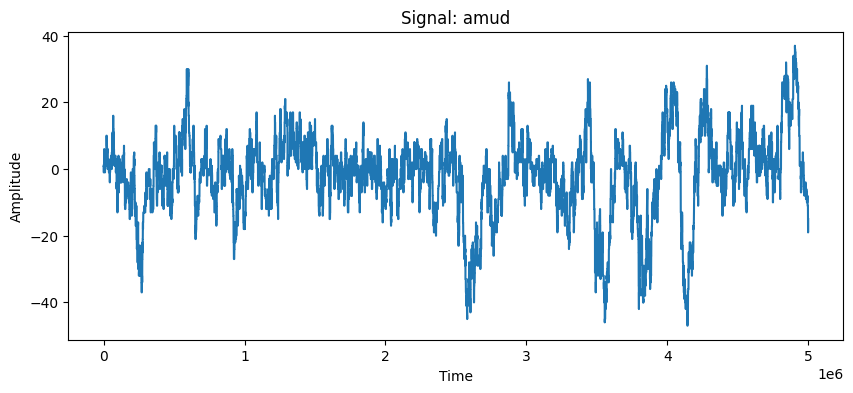

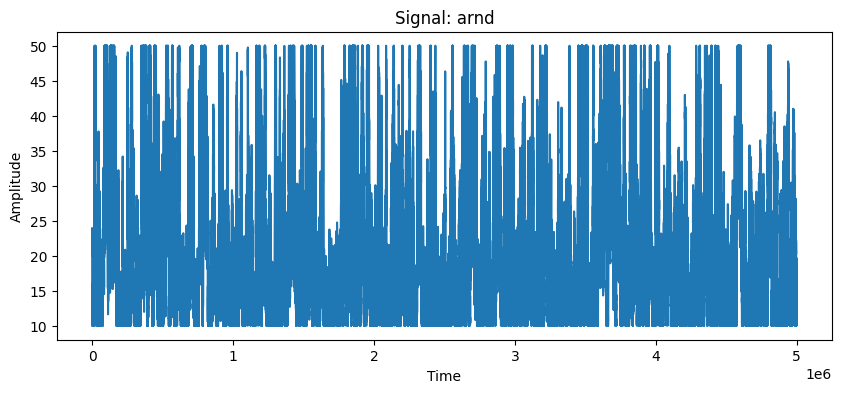

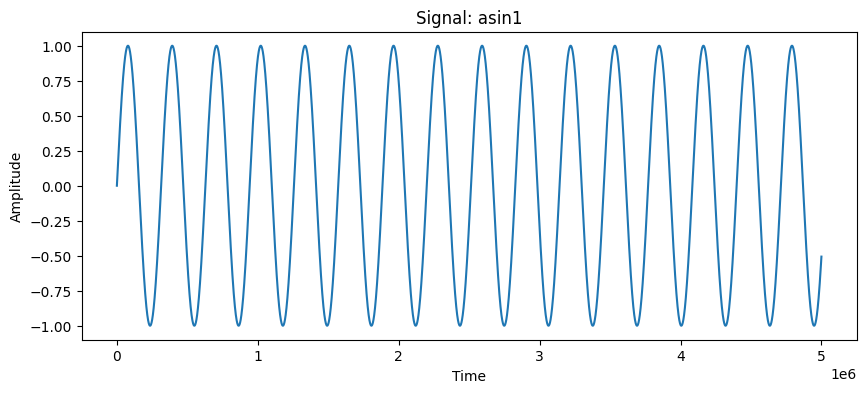

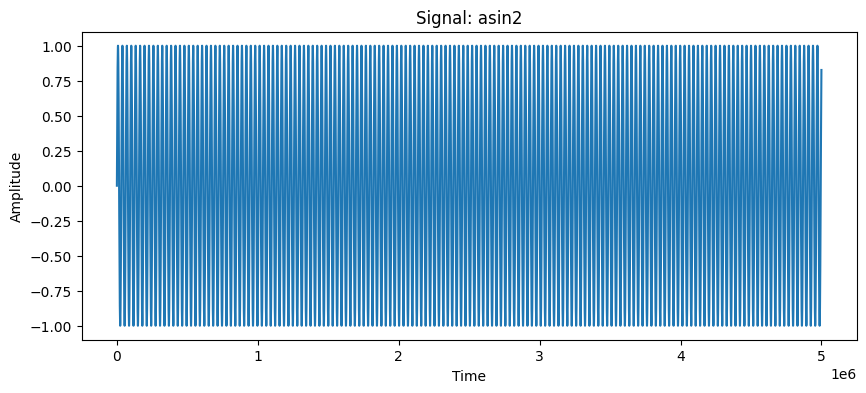

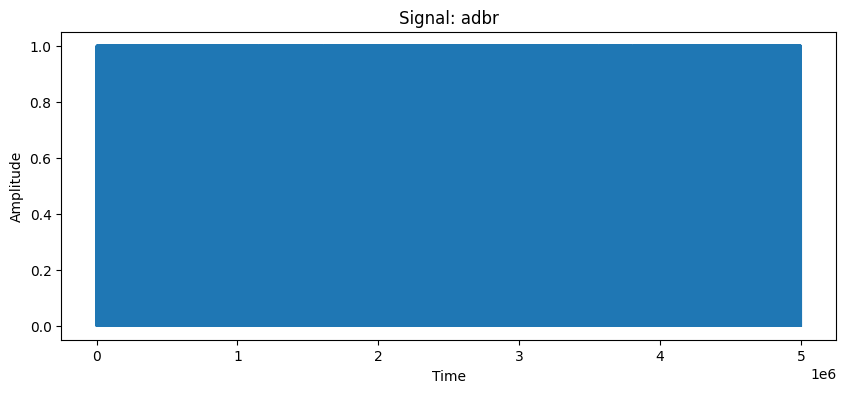

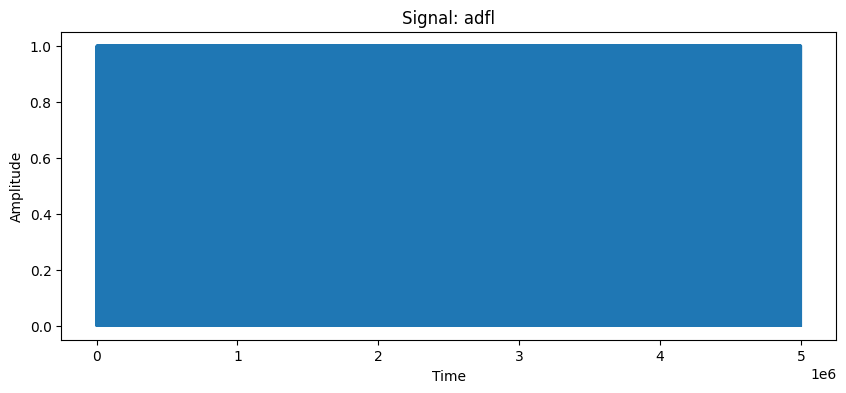

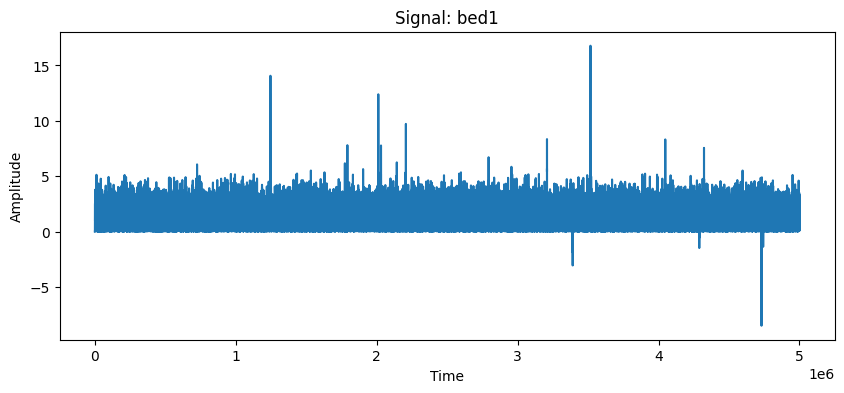

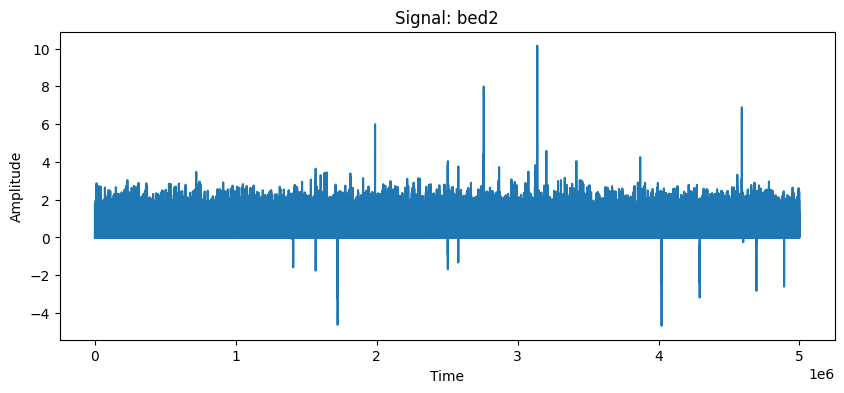

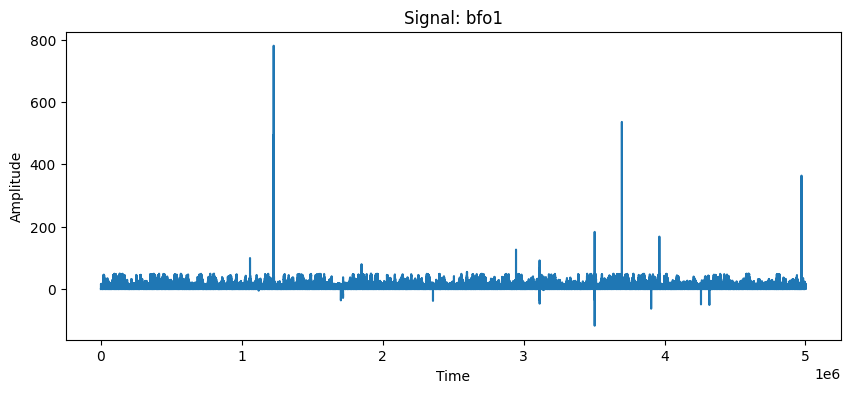

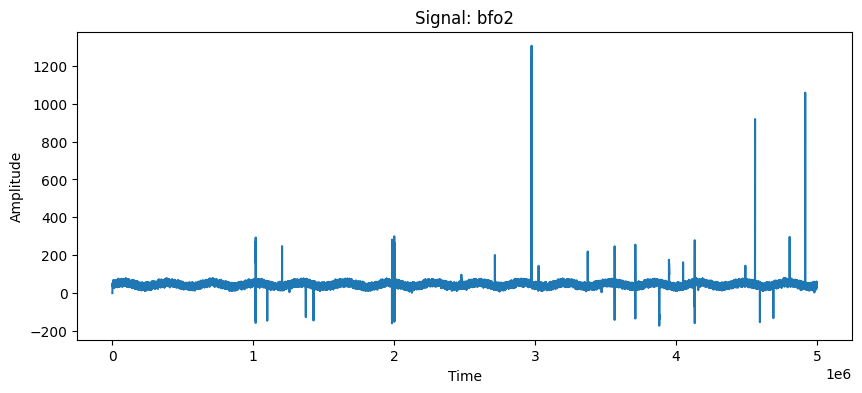

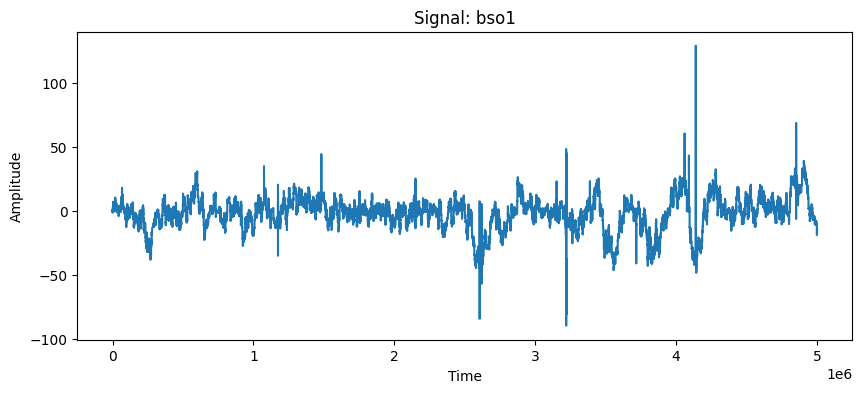

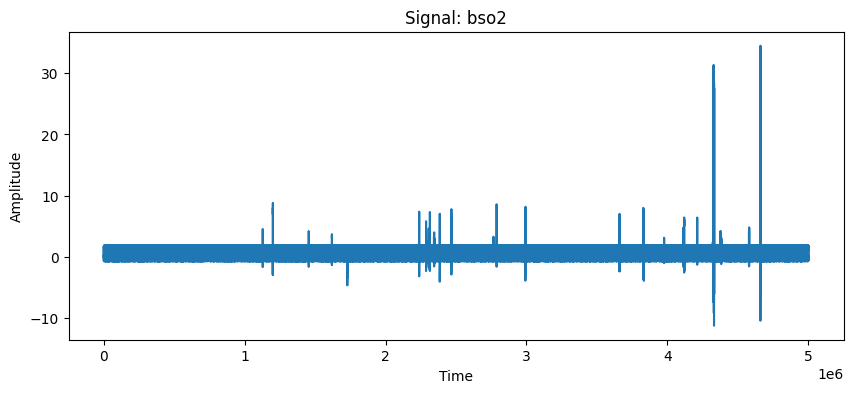

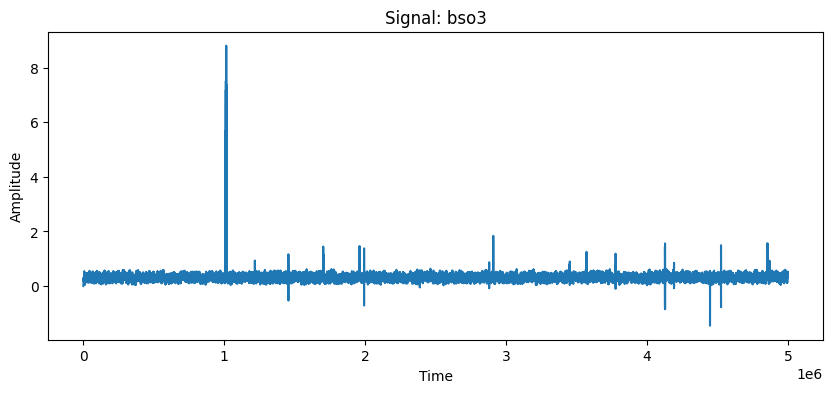

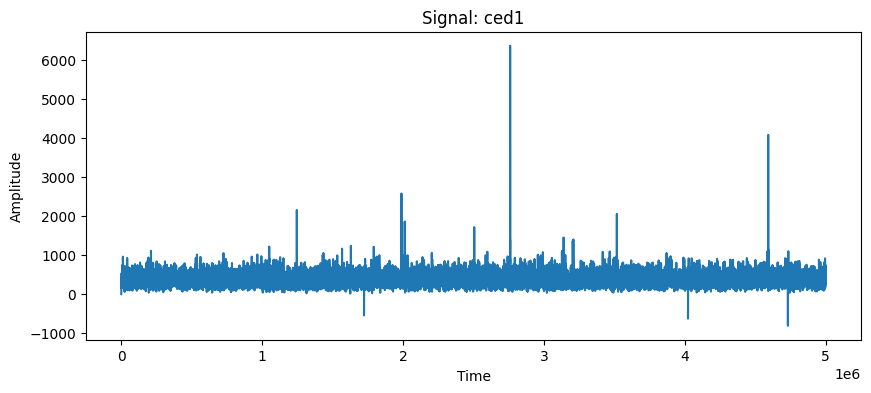

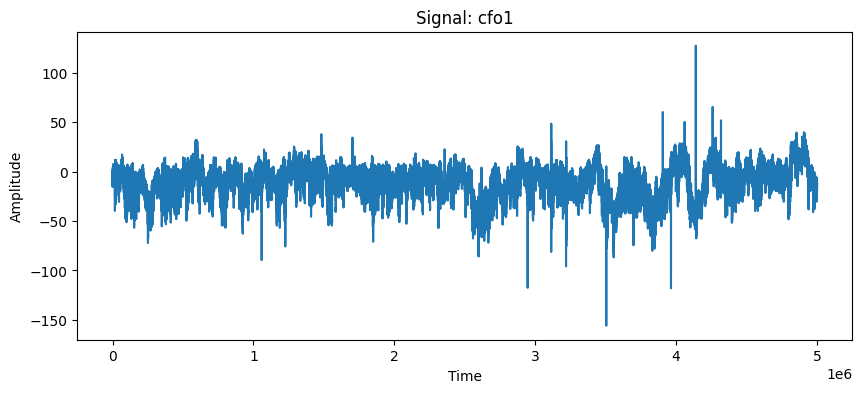

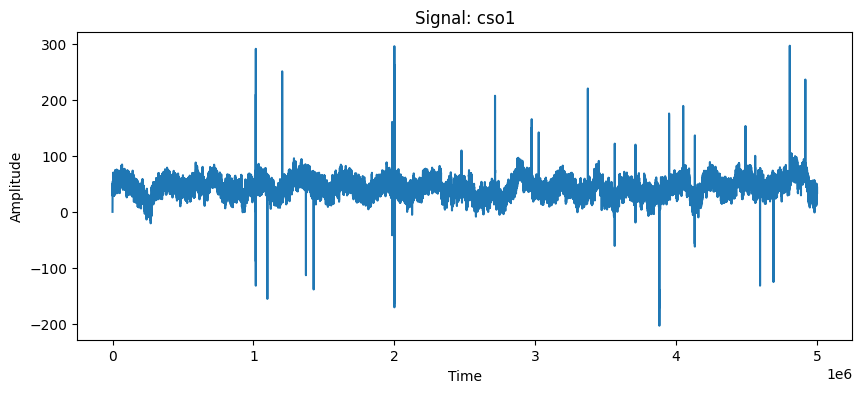


Start of frequency pre-train epoch 0
pre-reconstruction_loss: 2.3614464
Start of frequency pre-train epoch 1
pre-reconstruction_loss: 2.3290906
Start of frequency pre-train epoch 2
pre-reconstruction_loss: 2.2245207
Start of frequency pre-train epoch 3
pre-reconstruction_loss: 2.256595
Start of frequency pre-train epoch 4
pre-reconstruction_loss: 2.1013427
Start of frequency pre-train epoch 5
pre-reconstruction_loss: 2.0913754
Start of frequency pre-train epoch 6
pre-reconstruction_loss: 2.2036252
Start of frequency pre-train epoch 7
pre-reconstruction_loss: 2.0204868
Start of frequency pre-train epoch 8
pre-reconstruction_loss: 2.1888595
Start of frequency pre-train epoch 9
found common oscillations at period(s) = [8333.333333333334]

Start of sine representation pre-train epoch 0
sine_loss: 14.253601
Start of sine representation pre-train epoch 1
sine_loss: 12.850401
Start of sine representation pre-train epoch 2
sine_loss: 11.799658
Start of sine representation pre-train epoch 3
si

AttributeError: EagerTensor object has no attribute 'astype'. 
        If you are looking for numpy-related methods, please run the following:
        tf.experimental.numpy.experimental_enable_numpy_behavior()
      

In [ ]:
# Import necessary libraries
from joblib import dump, load
from models import freqcoder, sincoder, RANCoders
import numpy as np
import os
from scipy.signal import find_peaks
from spectrum import Periodogram
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.models import Model, model_from_json
from typing import List, Optional
import pandas as pd  # Added for CSV data loading
import matplotlib.pyplot as plt  # Added for visualization
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, mean_absolute_error  # Added for evaluation metrics


# ==================== Load Data from CSV ====================
def load_data_from_csv(filepath: str):
    """
    Load data from a CSV file.
    
    Parameters:
    - filepath: str, path to the CSV file
    
    Returns:
    - data: pandas DataFrame containing the data
    """
    data = pd.read_csv("D:/College/George Brown/industry project/data.csv")
    return data


# ==================== Perform EDA ====================
def perform_eda(data):
    """
    Perform exploratory data analysis on the dataset.
    
    Parameters:
    - data: pandas DataFrame containing the data
    """
    # Check for missing values
    print("Missing values:\n", data.isnull().sum())
    
    # Summary statistics
    print("Summary statistics:\n", data.describe())
    
    # Data distribution
    data.hist(bins=50, figsize=(20, 15))
    plt.show()


# ==================== Visualize Individual Signals ====================
def visualize_signals(data, signal_columns):
    """
    Visualize individual signals from the dataset.
    
    Parameters:
    - data: pandas DataFrame containing the data
    - signal_columns: list of columns to visualize
    """
    for column in signal_columns:
        plt.figure(figsize=(10, 4))
        plt.plot(data[column])
        plt.title(f'Signal: {column}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()


# ==================== Handle Missing Data ====================
def handle_missing_data(data, method='interpolate'):
    """
    Handle missing data in the dataset.
    
    Parameters:
    - data: pandas DataFrame containing the data
    - method: str, method to handle missing data ('interpolate', 'fill', 'drop')
    
    Returns:
    - data: pandas DataFrame with handled missing data
    """
    if method == 'interpolate':
        data = data.interpolate()
    elif method == 'fill':
        data = data.fillna(method='ffill').fillna(method='bfill')
    elif method == 'drop':
        data = data.dropna()
    return data


# ==================== Evaluate Model ====================
def evaluate_model(y_true, y_pred, task='classification'):
    """
    Evaluate the model using appropriate metrics.
    
    Parameters:
    - y_true: array-like, true labels
    - y_pred: array-like, predicted labels
    - task: str, 'classification' or 'regression'
    
    Returns:
    - metrics: dict, evaluation metrics
    """
    metrics = {}
    if task == 'classification':
        metrics['precision'] = precision_score(y_true, y_pred, average='weighted')
        metrics['recall'] = recall_score(y_true, y_pred, average='weighted')
        metrics['f1_score'] = f1_score(y_true, y_pred, average='weighted')
        metrics['confusion_matrix'] = confusion_matrix(y_true, y_pred)
    elif task == 'regression':
        metrics['mse'] = mean_squared_error(y_true, y_pred)
        metrics['mae'] = mean_absolute_error(y_true, y_pred)
    return metrics


# ==================== Test Model on Unseen Data ====================
def test_model_on_unseen_data(model, x_test, t_test):
    """
    Test the model on unseen data.
    
    Parameters:
    - model: trained model
    - x_test: array-like, test features
    - t_test: array-like, test time steps
    
    Returns:
    - predictions: array-like, model predictions
    """
    predictions = model.predict(x_test, t_test)
    return predictions


# ==================== Validate Root Cause Identification ====================
def validate_root_cause(predictions, true_causes):
    """
    Validate the root cause identification mechanism.
    
    Parameters:
    - predictions: array-like, model predictions
    - true_causes: array-like, true root causes
    
    Returns:
    - accuracy: float, accuracy of root cause identification
    """
    accuracy = np.mean(predictions == true_causes)
    return accuracy


# ==================== RANSynCoders Class ====================
class RANSynCoders():
    """ class for building, training, and testing rancoders models """
    def __init__(
            self,
            # Rancoders inputs:
            n_estimators: int = 100,
            max_features: int = 3,
            encoding_depth: int = 2,
            latent_dim: int = 2, 
            decoding_depth: int = 2,
            activation: str = 'linear',
            output_activation: str = 'linear',
            delta: float = 0.05,  # quantile bound for regression
            # Syncrhonization inputs
            synchronize: bool = False,
            force_synchronization: bool = True,  # if synchronization is true but no significant frequencies found
            min_periods: int = 3,  # if synchronize and forced, this is the minimum bound on cycles to look for in train set
            freq_init: Optional[List[float]] = None,  # initial guess for the dominant angular frequency
            max_freqs: int = 1,  # the number of sinusoidal signals to fit
            min_dist: int = 60,  # maximum distance for finding local maximums in the PSD
            trainable_freq: bool = False,  # whether to make the frequency a variable during layer weight training
            bias: bool = True,  # add intercept (vertical displacement)
    ):
        # Rancoders inputs:
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.encoding_depth = encoding_depth
        self.latent_dim = latent_dim
        self.decoding_depth = decoding_depth
        self.activation = activation
        self.output_activation = output_activation
        self.delta = delta
        
        # Syncrhonization inputs
        self.synchronize = synchronize
        self.force_synchronization = force_synchronization
        self.min_periods = min_periods
        self.freq_init = freq_init  # in radians (angular frequency)
        self.max_freqs = max_freqs
        self.min_dist = min_dist
        self.trainable_freq = trainable_freq
        self.bias = bias
        
        # set all variables to default to float32
        tf.keras.backend.set_floatx('float32')
        
    def build(self, input_shape, initial_stage: bool = False):
        x_in = Input(shape=(input_shape[-1],))  # created for either raw signal or synchronized signal
        if initial_stage:
            freq_out = freqcoder()(x_in)
            self.freqcoder = Model(inputs=x_in, outputs=freq_out)
            self.freqcoder.compile(optimizer='adam', loss=lambda y,f: quantile_loss(0.5, y,f))
        else:
            bounds_out = RANCoders(
                    n_estimators = self.n_estimators,
                    max_features = self.max_features,
                    encoding_depth = self.encoding_depth,
                    latent_dim = self.latent_dim,
                    decoding_depth = self.decoding_depth,
                    delta = self.delta,
                    activation = self.activation,
                    output_activation = self.output_activation,
                    name='rancoders'
                )(x_in)
            self.rancoders = Model(inputs=x_in, outputs=bounds_out)
            self.rancoders.compile(
                    optimizer='adam', 
                    loss=[lambda y,f: quantile_loss(1-self.delta, y,f), lambda y,f: quantile_loss(self.delta, y,f)]
            )  
            if self.synchronize:
                t_in = Input(shape=(input_shape[-1],))
                sin_out = sincoder(freq_init=self.freq_init, trainable_freq=self.trainable_freq)(t_in)
                self.sincoder = Model(inputs=t_in, outputs=sin_out)
                self.sincoder.compile(optimizer='adam', loss=lambda y,f: quantile_loss(0.5, y,f))
        
    def fit(
            self, 
            x: np.ndarray, 
            t: np.ndarray,
            epochs: int = 25, 
            batch_size: int = 360, 
            shuffle: bool = True, 
            freq_warmup: int = 10,  # number of warmup epochs to prefit the frequency
            sin_warmup: int = 10,  # number of warmup epochs to prefit the sinusoidal representation
            pos_amp: bool = True,  # whether to constraint amplitudes to be +ve only
    ):
        
        # Prepare the training batches.
        dataset = tf.data.Dataset.from_tensor_slices((x.astype(np.float32), t.astype(np.float32)))
        if shuffle:
            dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)
            
        # build and compile models (stage 1)
        if self.synchronize:
            self.build(x.shape, initial_stage=True)
            if self.freq_init:
                self.build(x.shape)
        else:
            self.build(x.shape)
        
        # pretraining step 1:
        if freq_warmup > 0 and self.synchronize and not self.freq_init:
            for epoch in range(freq_warmup):
                print("\nStart of frequency pre-train epoch %d" % (epoch,))
                for step, (x_batch, t_batch) in enumerate(dataset):
                    # Prefit the oscillation encoder
                    with tf.GradientTape() as tape:
                        # forward pass
                        z, x_pred = self.freqcoder(x_batch)
                        
                        # compute loss
                        x_loss = self.freqcoder.loss(x_batch, x_pred)  # median loss
                    
                    # retrieve gradients and update weights
                    grads = tape.gradient(x_loss, self.freqcoder.trainable_weights)
                    self.freqcoder.optimizer.apply_gradients(zip(grads, self.freqcoder.trainable_weights))
                print("pre-reconstruction_loss:", tf.reduce_mean(x_loss).numpy(), end='\r')
                
            # estimate dominant frequency
            z = self.freqcoder(x)[0].numpy().reshape(-1)  # must be done on full unshuffled series
            z = ((z - z.min()) / (z.max() - z.min())) * (1 - -1) + -1  #  scale between -1 & 1
            p = Periodogram(z, sampling=1)
            p()
            peak_idxs = find_peaks(p.psd, distance=self.min_dist, height=(0, np.inf))[0]
            peak_order = p.psd[peak_idxs].argsort()[-self.min_periods-self.max_freqs:][::-1]  # max PSDs found
            peak_idxs = peak_idxs[peak_order]
            if peak_idxs[0] < self.min_periods and not self.force_synchronization:
                self.synchronize = False
                print('no common oscillations found, switching off synchronization attempts')
            elif max(peak_idxs[:self.min_periods]) >= self.min_periods:
                idxs = peak_idxs[peak_idxs >= self.min_periods]
                peak_freqs = [p.frequencies()[idx] for idx in idxs[:min(len(idxs), self.max_freqs)]]
                self.freq_init = [2 * np.pi * f for f in peak_freqs]
                print('found common oscillations at period(s) = {}'.format([1 / f for f in peak_freqs]))
            else:
                self.synchronize = False
                print('no common oscillations found, switching off synchronization attempts')
            
            # build and compile models (stage 2)
            self.build(x.shape)
        
        # pretraining step 2:
        if sin_warmup > 0 and self.synchronize:
            for epoch in range(sin_warmup):
                print("\nStart of sine representation pre-train epoch %d" % (epoch,))
                for step, (x_batch, t_batch) in enumerate(dataset):
                    # Train the sine wave encoder
                    with tf.GradientTape() as tape:
                        # forward pass
                        s = self.sincoder(t_batch)
                        
                        # compute loss
                        s_loss = self.sincoder.loss(x_batch, s)  # median loss
                    
                    # retrieve gradients and update weights
                    grads = tape.gradient(s_loss, self.sincoder.trainable_weights)
                    self.sincoder.optimizer.apply_gradients(zip(grads, self.sincoder.trainable_weights))
                print("sine_loss:", tf.reduce_mean(s_loss).numpy(), end='\r')
            
            # invert params (all amplitudes should either be -ve or +ve). Here we make them +ve
            if pos_amp:
                a_adj = tf.where(
                    self.sincoder.layers[1].amp[:,0] < 0, 
                    self.sincoder.layers[1].amp[:,0] * -1, 
                    self.sincoder.layers[1].amp[:,0]
                )  # invert all -ve amplitudes
                wb_adj = tf.where(
                    self.sincoder.layers[1].amp[:,0] < 0, 
                    self.sincoder.layers[1].wb[:,0] + np.pi, 
                    self.sincoder.layers[1].wb[:,0]
                )  # shift inverted waves by half cycle
                wb_adj = tf.where(
                    wb_adj > 2*np.pi, self.sincoder.layers[1].wb[:,0] - np.pi, wb_adj
                )  # any cycle > freq must be reduced by half the cycle
                g_adj = tf.where(
                    self.sincoder.layers[1].amp[:,0] < 0, 
                    self.sincoder.layers[1].disp - a_adj, 
                    self.sincoder.layers[1].disp
                )  # adjust the vertical displacements after reversing amplitude signs
                K.set_value(self.sincoder.layers[1].amp[:,0], a_adj)
                K.set_value(self.sincoder.layers[1].wb[:,0], wb_adj)
                K.set_value(self.sincoder.layers[1].disp, g_adj)
                
        # train anomaly detector
        for epoch in range(epochs):
            print("\nStart of epoch %d" % (epoch,))
            if self.synchronize:
                for step, (x_batch, t_batch) in enumerate(dataset):
                    # Train the sine wave encoder
                    with tf.GradientTape() as tape:
                        # forward pass
                        s = self.sincoder(t_batch)
                        
                        # compute loss
                        s_loss = self.sincoder.loss(x_batch, s)  # median loss
                    
                    # retrieve gradients and update weights
                    grads = tape.gradient(s_loss, self.sincoder.trainable_weights)
                    self.sincoder.optimizer.apply_gradients(zip(grads, self.sincoder.trainable_weights))
                    
                    # synchronize batch
                    b = self.sincoder.layers[1].wb / self.sincoder.layers[1].freq  # phase shift(s)
                    b_sync = b - tf.expand_dims(b[:,0], axis=-1)
                    th_sync = tf.expand_dims(
                        tf.expand_dims(self.sincoder.layers[1].freq, axis=0), axis=0
                    ) * (tf.expand_dims(t_batch, axis=-1) + tf.expand_dims(b_sync, axis=0))  # synchronized angle
                    e = (
                        x_batch - s
                    ) * tf.sin(
                        self.sincoder.layers[1].freq[0] * ((np.pi / (2 * self.sincoder.layers[1].freq[0])) - b[:,0])
                    )  # noise
                    x_batch_sync = tf.reduce_sum(
                        tf.expand_dims(self.sincoder.layers[1].amp, axis=0) * tf.sin(th_sync), axis=-1
                    ) + self.sincoder.layers[1].disp + e
                    
                    # train the rancoders
                    with tf.GradientTape() as tape:
                        # forward pass
                        o_hi, o_lo = self.rancoders(x_batch_sync)
                        
                        # compute losses
                        o_hi_loss = self.rancoders.loss[0](
                            tf.tile(tf.expand_dims(x_batch_sync, axis=0), (self.n_estimators, 1, 1)), o_hi
                        )
                        o_lo_loss = self.rancoders.loss[1](
                            tf.tile(tf.expand_dims(x_batch_sync, axis=0), (self.n_estimators, 1, 1)), o_lo
                        )
                        o_loss = o_hi_loss + o_lo_loss

                    # retrieve gradients and update weights
                    grads = tape.gradient(o_loss, self.rancoders.trainable_weights)
                    self.rancoders.optimizer.apply_gradients(zip(grads, self.rancoders.trainable_weights))
                print(
                    "sine_loss:", tf.reduce_mean(s_loss).numpy(), 
                    "upper_bound_loss:", tf.reduce_mean(o_hi_loss).numpy(), 
                    "lower_bound_loss:", tf.reduce_mean(o_lo_loss).numpy(), 
                    end='\r'
                )
            else:
                for step, (x_batch, t_batch) in enumerate(dataset):
                   # train the rancoders
                    with tf.GradientTape() as tape:
                        # forward pass
                        o_hi, o_lo = self.rancoders(x_batch)
                        
                        # compute losses
                        o_hi_loss = self.rancoders.loss[0](
                            tf.tile(tf.expand_dims(x_batch, axis=0), (self.n_estimators, 1, 1)), o_hi
                        )
                        o_lo_loss = self.rancoders.loss[1](
                            tf.tile(tf.expand_dims(x_batch, axis=0), (self.n_estimators, 1, 1)), o_lo
                        )
                        o_loss = o_hi_loss + o_lo_loss

                    # retrieve gradients and update weights
                    grads = tape.gradient(o_loss, self.rancoders.trainable_weights)
                    self.rancoders.optimizer.apply_gradients(zip(grads, self.rancoders.trainable_weights))
                print(
                    "upper_bound_loss:", tf.reduce_mean(o_hi_loss).numpy(), 
                    "lower_bound_loss:", tf.reduce_mean(o_lo_loss).numpy(), 
                    end='\r'
                )
            
    def predict(self, x: np.ndarray, t: np.ndarray, batch_size: int = 1000, desync: bool = False):
        # Prepare the training batches.
        dataset = tf.data.Dataset.from_tensor_slices((x.astype(np.float32), t.astype(np.float32)))
        dataset = dataset.batch(batch_size)
        batches = int(np.ceil(x.shape[0] / batch_size))
        
        # loop through the batches of the dataset.
        if self.synchronize:
            s, x_sync, o_hi, o_lo = [None] * batches, [None] * batches, [None] * batches, [None] * batches
            for step, (x_batch, t_batch) in enumerate(dataset):
                s_i = self.sincoder(t_batch).numpy()
                b = self.sincoder.layers[1].wb / self.sincoder.layers[1].freq  # phase shift(s)
                b_sync = b - tf.expand_dims(b[:,0], axis=-1)
                th_sync = tf.expand_dims(
                    tf.expand_dims(self.sincoder.layers[1].freq, axis=0), axis=0
                ) * (tf.expand_dims(t_batch, axis=-1) + tf.expand_dims(b_sync, axis=0))  # synchronized angle
                e = (
                    x_batch - s_i
                ) * tf.sin(
                    self.sincoder.layers[1].freq[0] * ((np.pi / (2 * self.sincoder.layers[1].freq[0])) - b[:,0])
                )  # noise
                x_sync_i = (tf.reduce_sum(
                    tf.expand_dims(self.sincoder.layers[1].amp, axis=0) * tf.sin(th_sync), axis=-1
                ) + self.sincoder.layers[1].disp + e).numpy()  
                o_hi_i, o_lo_i = self.rancoders(x_sync_i)
                o_hi_i, o_lo_i = tf.transpose(o_hi_i, [1,0,2]).numpy(), tf.transpose(o_lo_i, [1,0,2]).numpy()
                if desync:
                    o_hi_i, o_lo_i = self.predict_desynchronize(x_batch, x_sync_i, o_hi_i, o_lo_i)
                s[step], x_sync[step], o_hi[step], o_lo[step]  = s_i, x_sync_i, o_hi_i, o_lo_i
            return (
                np.concatenate(s, axis=0), 
                np.concatenate(x_sync, axis=0), 
                np.concatenate(o_hi, axis=0), 
                np.concatenate(o_lo, axis=0)
            )
        else:
            o_hi, o_lo = [None] * batches, [None] * batches
            for step, (x_batch, t_batch) in enumerate(dataset):
                o_hi_i, o_lo_i = self.rancoders(x_batch)
                o_hi_i, o_lo_i = tf.transpose(o_hi_i, [1,0,2]).numpy(), tf.transpose(o_lo_i, [1,0,2]).numpy()
                o_hi[step], o_lo[step]  = o_hi_i, o_lo_i
            return np.concatenate(o_hi, axis=0), np.concatenate(o_lo, axis=0)
        
    def save(self, filepath: str = os.path.join(os.getcwd(), 'ransyncoders.z')):
        file = {'params': self.get_config()}
        if self.synchronize:
            file['freqcoder'] = {'model': self.freqcoder.to_json(), 'weights': self.freqcoder.get_weights()}
            file['sincoder'] = {'model': self.sincoder.to_json(), 'weights': self.sincoder.get_weights()}
        file['rancoders'] = {'model': self.rancoders.to_json(), 'weights': self.rancoders.get_weights()}
        dump(file, filepath, compress=True)
    
    @classmethod
    def load(cls, filepath: str = os.path.join(os.getcwd(), 'ransyncoders.z')):
        file = load(filepath)
        cls = cls()
        for param, val in file['params'].items():
            setattr(cls, param, val)
        if cls.synchronize:
            cls.freqcoder = model_from_json(file['freqcoder']['model'], custom_objects={'freqcoder': freqcoder})
            cls.freqcoder.set_weights(file['freqcoder']['weights'])
            cls.sincoder = model_from_json(file['sincoder']['model'], custom_objects={'sincoder': sincoder})
            cls.sincoder.set_weights(file['sincoder']['weights'])
        cls.rancoders = model_from_json(file['rancoders']['model'], custom_objects={'RANCoders': RANCoders})  
        cls.rancoders.set_weights(file['rancoders']['weights'])
        return cls
    
    def predict_desynchronize(self, x: np.ndarray, x_sync: np.ndarray, o_hi: np.ndarray, o_lo: np.ndarray):
        if self.synchronize:
            E = (o_hi + o_lo)/ 2  # expected values
            deviation = tf.expand_dims(x_sync, axis=1) - E  # input (synchronzied) deviation from expected
            deviation = self.desynchronize(deviation)  # desynchronize
            E = tf.expand_dims(x, axis=1) - deviation  # expected values in desynchronized form
            offset = (o_hi - o_lo) / 2  # this is the offet from the expected value
            offset = abs(self.desynchronize(offset))  # desynch
            o_hi, o_lo = E + offset, E - offset  # add bound displacement to expected values
            return o_hi.numpy(), o_lo.numpy()  
        else:
            raise ParameterError('synchronize', 'parameter not set correctly for this method')
    
    def desynchronize(self, e: np.ndarray):
        if self.synchronize:
            b = self.sincoder.layers[1].wb / self.sincoder.layers[1].freq  # phase shift(s)
            return e * tf.sin(
                self.sincoder.layers[1].freq[0] * ((np.pi / (2 * self.sincoder.layers[1].freq[0])) + b[:,0])
            ).numpy()
        else:
            raise ParameterError('synchronize', 'parameter not set correctly for this method')
        
        
    def get_config(self):
        config = {
            "n_estimators": self.n_estimators,
            "max_features": self.max_features,
            "encoding_depth": self.encoding_depth,
            "latent_dim": self.encoding_depth,
            "decoding_depth": self.decoding_depth,
            "activation": self.activation,
            "output_activation": self.output_activation,
            "delta": self.delta,
            "synchronize": self.synchronize,
            "force_synchronization": self.force_synchronization,
            "min_periods": self.min_periods,
            "freq_init": self.freq_init,
            "max_freqs": self.max_freqs,
            "min_dist": self.min_dist,
            "trainable_freq": self.trainable_freq,
            "bias": self.bias,
        }
        return config
        
        
# Loss function
def quantile_loss(q, y, f):
    e = (y - f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)


class ParameterError(Exception):

    def __init__(self, expression, message):
        self.expression = expression
        self.message = message

# ==================== Main Execution ====================
"""def main():
    # Load data
    data = load_data_from_csv("D:/College/George Brown/industry project/data.csv")
    
    # Perform EDA (optional)
    perform_eda(data)
    
    # Handle missing data
    data = handle_missing_data(data, method='interpolate')  # Choose method
    
    # Visualize signals (optional)
    signal_columns = ['aimp', 'amud', 'arnd', 'asin1', 'asin2', 'adbr', 'adfl', 'bed1',
                      'bed2', 'bfo1', 'bfo2', 'bso1', 'bso2', 'bso3', 'ced1', 'cfo1', 'cso1']
    visualize_signals(data, signal_columns)
    
    # Prepare input data (x = features, t = time steps)
    x = data[signal_columns].values.astype(np.float32)  # Shape: (samples, features)
    t = np.arange(x.shape[0]).reshape(-1, 1).astype(np.float32)  # Time steps (0, 1, 2, ...)
    
    # Initialize model
    model = RANSynCoders(
        synchronize=True,  # Set to True if you want synchronization
        latent_dim=2,      # Match your data's latent dimension
        delta=0.05         # Quantile bound
    )
    model.build(x.shape)   # Build the model
    
    # Train the model
    model.fit(x, t, epochs=25, batch_size=360)
    
    # Predict using the trained model
    predictions = model.predict(x, t)
    
    # Example: Evaluate model (use 'y' as the target column)
    y_true = data['y'].values.astype(np.float32)  # Use 'y' as the target column
    metrics = evaluate_model(y_true, predictions, task='regression')
    print("Model Metrics:", metrics)

if __name__ == "__main__":
    main()"""

def main():
    # Clear TensorFlow session to free up memory
    tf.keras.backend.clear_session()
    
    # Load data
    data = load_data_from_csv("D:/College/George Brown/industry project/data.csv")

    
    # Perform EDA (optional)
    perform_eda(data)
    
    # Handle missing data
    data = handle_missing_data(data, method='interpolate')  # Choose method
    
    # Visualize signals (optional)
    signal_columns = ['aimp', 'amud', 'arnd', 'asin1', 'asin2', 'adbr', 'adfl', 'bed1',
                      'bed2', 'bfo1', 'bfo2', 'bso1', 'bso2', 'bso3', 'ced1', 'cfo1', 'cso1']
    visualize_signals(data, signal_columns)
    
    # Prepare input data (x = features, t = time steps)
    x = data[signal_columns].values.astype(np.float32)  # Shape: (samples, features)
    t = np.arange(x.shape[0]).reshape(-1, 1).astype(np.float32)  # Time steps (0, 1, 2, ...)
    
    # Initialize model
    model = RANSynCoders(
        synchronize=True,  # Set to True if you want synchronization
        latent_dim=2,      # Match your data's latent dimension
        delta=0.05         # Quantile bound
    )
    model.build(x.shape)   # Build the model
    
    # Define a checkpoint directory
    checkpoint_dir = "checkpoints"
    os.makedirs(checkpoint_dir, exist_ok=True)
    
    # Check if a checkpoint exists and load the latest one
    latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
    if latest_checkpoint:
        print(f"Loading model from checkpoint: {latest_checkpoint}")
        model.load_weights(latest_checkpoint)
        
        # Load intermediate predictions if they exist
        prediction_files = sorted([f for f in os.listdir(checkpoint_dir) if f.startswith("predictions_batch_")])
        if prediction_files:
            latest_prediction_file = os.path.join(checkpoint_dir, prediction_files[-1])
            predictions = [np.load(latest_prediction_file)]
            print(f"Loaded predictions from {latest_prediction_file}")
        else:
            predictions = []
    else:
        predictions = []
    
    # Define a checkpoint callback
    checkpoint_path = os.path.join(checkpoint_dir, "model_epoch_{epoch}.ckpt")
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        save_weights_only=True,  # Save only the model's weights
        save_freq='epoch',       # Save at the end of every epoch
        verbose=1
    )
    
    # Train the model with checkpointing
    model.fit(x, t, epochs=25, batch_size=360, callbacks=[checkpoint_callback])
    
    # Prepare the dataset for prediction
    dataset = tf.data.Dataset.from_tensor_slices((x, t)).batch(64)  # Adjust batch size as needed
    
    # Predict in smaller batches
    for i, (x_batch, t_batch) in enumerate(dataset):
        try:
            pred = model.predict(x_batch.numpy(), t_batch.numpy(), batch_size=64)
            predictions.append(pred)
            
            # Save intermediate predictions every 10 batches
            if (i + 1) % 10 == 0:
                np.save(os.path.join(checkpoint_dir, f"predictions_batch_{i + 1}.npy"), np.concatenate(predictions, axis=0))
                print(f"Saved predictions up to batch {i + 1}")
        except Exception as e:
            print(f"Error at batch {i + 1}: {e}")
            break
    
    # Concatenate predictions
    predictions = np.concatenate(predictions, axis=0)
    
    # Example: Evaluate model (use 'y' as the target column)
    y_true = data['y'].values.astype(np.float32)  # Use 'y' as the target column
    metrics = evaluate_model(y_true, predictions, task='regression')
    print("Model Metrics:", metrics)

if __name__ == "__main__":
    main()
